In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Чтение данных
Читаем данные, удаляем ненужные колонки

In [2]:
data = pd.read_csv('./data-001.csv',
                   parse_dates=['date_time'])
data = data.drop(
    columns=['oaid_hash', 'banner_id0', 'banner_id1', 'rate0', 'rate1', 'g0', 'g1', 'coeff_sum0', 'coeff_sum1'])
data = data.sort_values(by='date_time')
data.head()

,date_time,zone_id,banner_id,campaign_clicks,os_id,country_id,impressions,clicks
1390198,2021-09-01 00:02:49,30,596,0,0,7,1,0
5041415,2021-09-26 00:00:00,41,29,1,3,0,1,0
1442602,2021-09-26 00:00:00,1,188,2,2,15,1,0
7232498,2021-09-26 00:00:00,17,52,2,2,5,1,0
14938691,2021-09-26 00:00:00,47,73,1,4,13,1,0


### 2. Анализ данных
Проанализируем данные: статистики по каждой фиче, количество уникальных значений, отсутствующих значений, гистограммы распределений значений каждой из фич.

In [3]:
import numpy as np

In [4]:
def analysis(data: pd.DataFrame):
    # множество статистических значений для датасета
    display(data.describe())

    # количество уникальных значений для каждой фичи
    print('Unique values count for each feature:')
    print(data.nunique(axis=0, dropna=True))
    print('-' * 60)

    # распределение значений каждой из фич
    for col in data.drop(columns=['date_time']).columns:
        data.hist(col, figsize=(15, 5), color='green')
        plt.show()

    # количество NaN значений в каждом столбце
    print('NaN values count for each feature:')
    print(data.isna().sum())
    print('-' * 60)

    # распределение количества сэмплов по дате и времени -- позволит увидеть, за какие моменты у нас в принципе есть данные, и в каком объеме
    print(f"Start day: {data['date_time'].min()}")
    print(f"End day: {data['date_time'].max()}")
    print("Date time samples count:")
    display(data.groupby('date_time').size())
    

,date_time,zone_id,banner_id,campaign_clicks,os_id,country_id,impressions,clicks
count,15821472,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,15821472.0,1.582147e+07
mean,2021-09-29 06:17:04.484696576,8.152679e+01,3.816483e+02,6.238540e-01,1.840605e+00,4.346986e+00,1.0,2.668835e-02
min,2021-09-01 00:02:49,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00
25%,2021-09-27 10:24:02,1.400000e+01,5.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00
50%,2021-09-29 02:22:11,1.900000e+01,2.170000e+02,0.000000e+00,2.000000e+00,4.000000e+00,1.0,0.000000e+00
75%,2021-09-30 21:36:15,6.000000e+01,6.110000e+02,0.000000e+00,3.000000e+00,7.000000e+00,1.0,0.000000e+00
max,2021-10-02 23:59:59,3.443000e+03,1.632000e+03,8.290000e+02,1.000000e+01,1.600000e+01,1.0,1.000000e+00
std,NaN,1.632448e+02,3.959386e+02,9.249152e+00,1.530005e+00,4.317701e+00,0.0,1.611710e-01


Unique values count for each feature:
date_time          604712
zone_id              3444
banner_id            1633
campaign_clicks       822
os_id                  11
country_id             17
impressions             1
clicks                  2
dtype: int64
------------------------------------------------------------


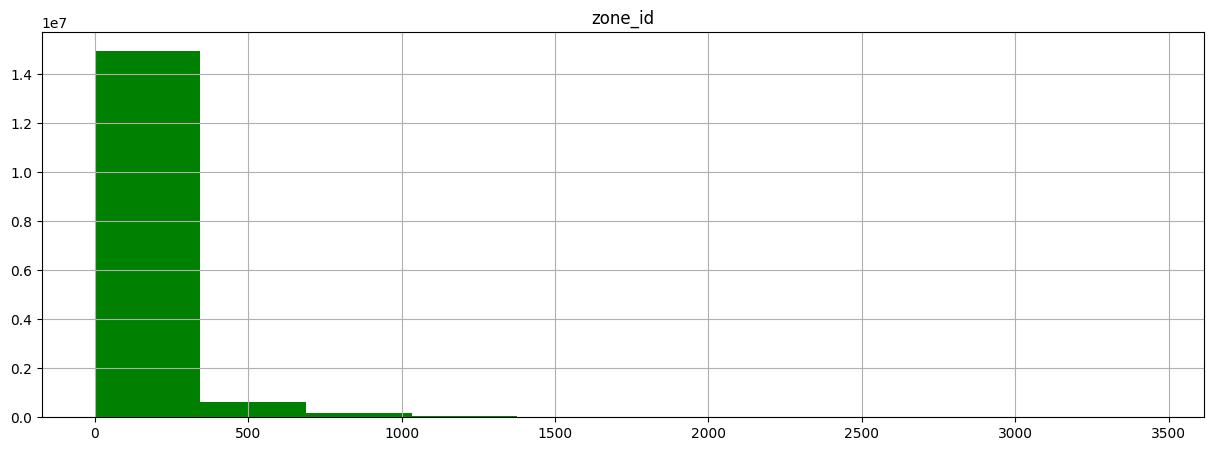

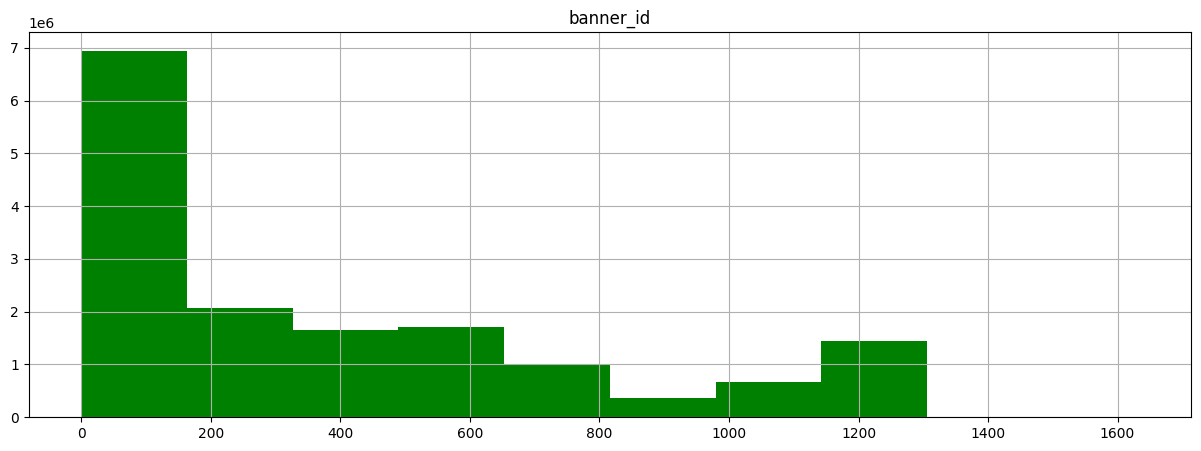

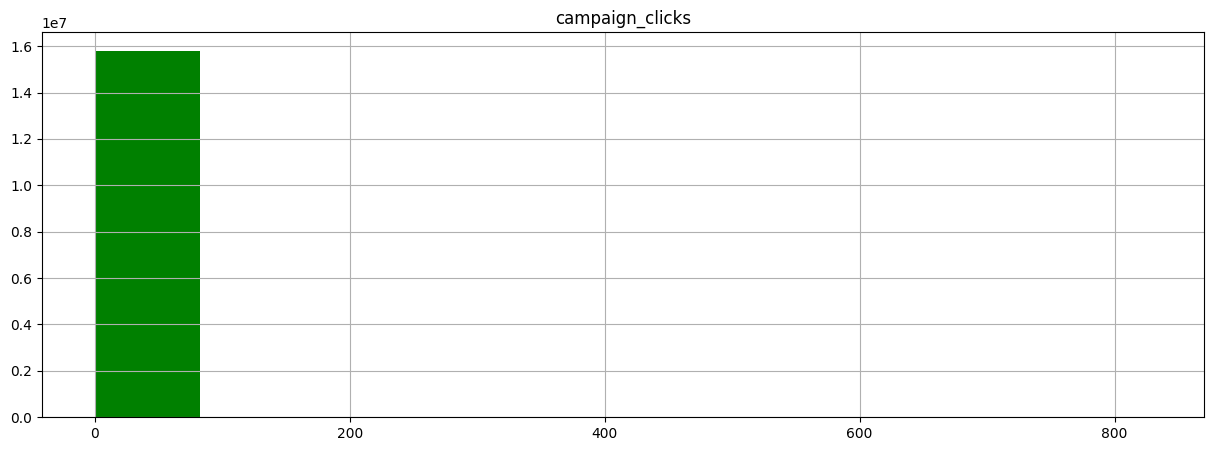

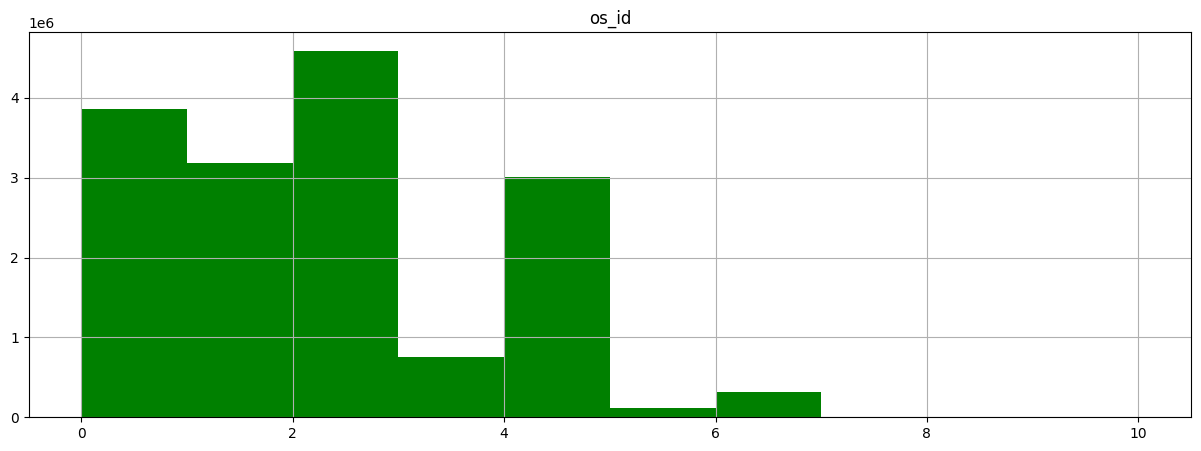

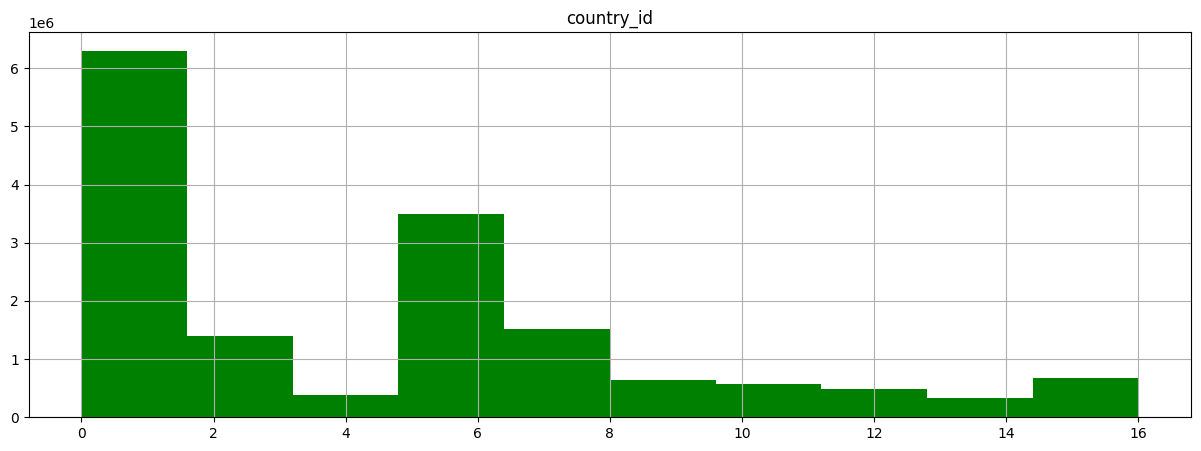

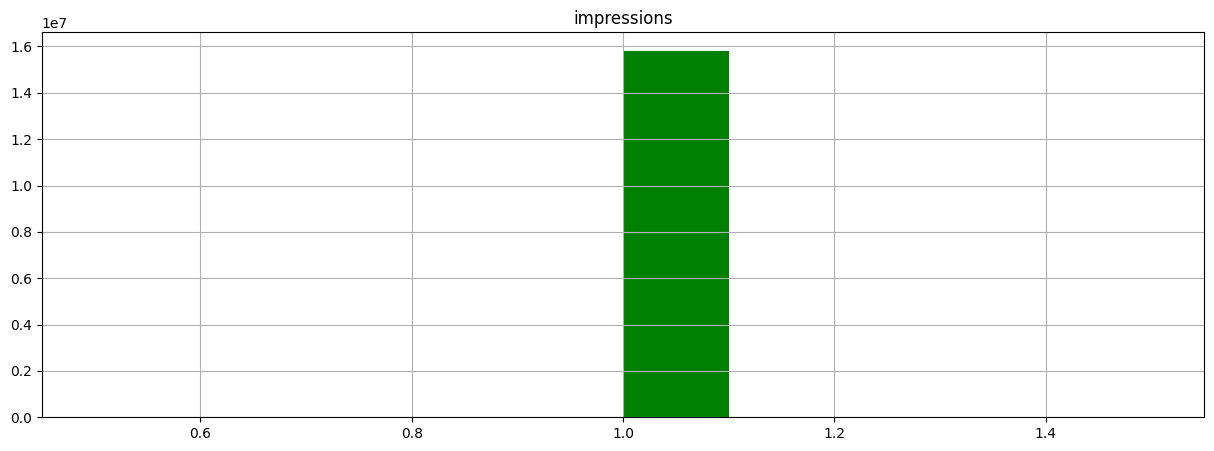

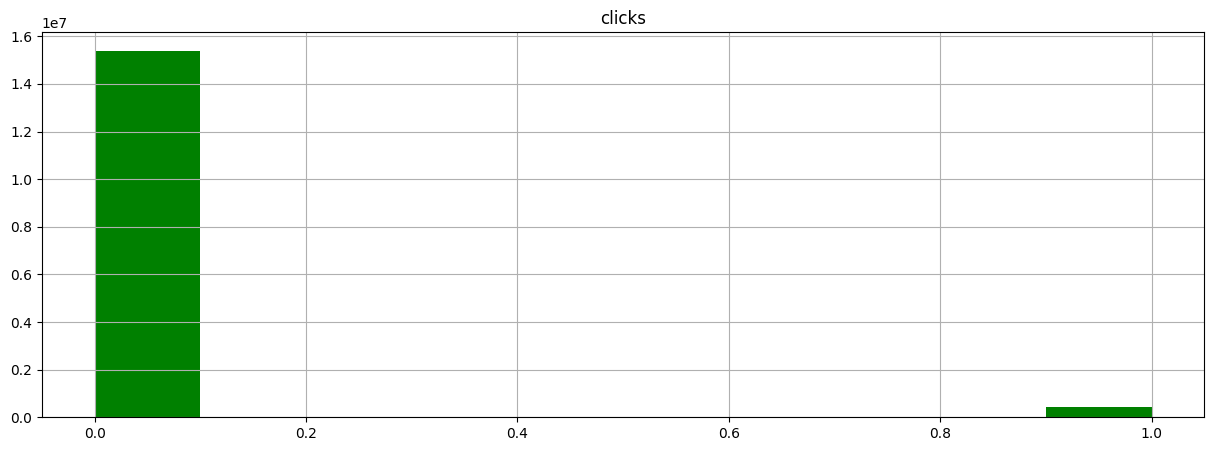

NaN values count for each feature:
date_time          0
zone_id            0
banner_id          0
campaign_clicks    0
os_id              0
country_id         0
impressions        0
clicks             0
dtype: int64
------------------------------------------------------------
Start day: 2021-09-01 00:02:49
End day: 2021-10-02 23:59:59
Date time samples count:


date_time
2021-09-01 00:02:49     1
2021-09-26 00:00:00    28
2021-09-26 00:00:01    28
2021-09-26 00:00:02    25
2021-09-26 00:00:03    30
                       ..
2021-10-02 23:59:55    22
2021-10-02 23:59:56    22
2021-10-02 23:59:57    19
2021-10-02 23:59:58    20
2021-10-02 23:59:59    19
Length: 604712, dtype: int64

In [5]:
analysis(data)

### 3. Фильтрация и конструирование фичей

Удалим повторяющиеся строки таблицы, если такие имеются

In [6]:
data = data.drop_duplicates()

Анализируя статистики, можем увидим, что значение поля impressions всегда одно и равно единице. Значит, все баннеры-сэмплы, данные о которых у нас имеются, в каждой конфигурации были показаны по одному разу. Так как фича является константой, она не играет роли при выборе класса объекта в нашей задаче классификации. Можем обойтись без этой колонки

In [7]:
data['impressions'].unique()

array([1])

In [8]:
data = data.drop(columns=['impressions'])
data.head()

,date_time,zone_id,banner_id,campaign_clicks,os_id,country_id,clicks
1390198,2021-09-01 00:02:49,30,596,0,0,7,0
5041415,2021-09-26 00:00:00,41,29,1,3,0,0
1442602,2021-09-26 00:00:00,1,188,2,2,15,0
7232498,2021-09-26 00:00:00,17,52,2,2,5,0
14938691,2021-09-26 00:00:00,47,73,1,4,13,0


Заметим, что все имеющиеся данные затрагивают только 2 месяца -- сентябрь и начало октября. Информация про год избыточна, тк у всех сэмплов одинакова. Кроме того, можем убрать измерения секунд, нам хватит знания часа и минут для каждого примера. Добавим отдельные столбцы day, hour, minute. После разделения на train и test впоследствии удалим столбец date_time. Добавим информацию про день недели как новую полезную для анализа рекламных событий фичу.

In [9]:
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data['minutes'] = data['date_time'].dt.minute
data['weekday'] = data['date_time'].dt.day_name()

data.head()

,date_time,zone_id,banner_id,campaign_clicks,os_id,country_id,clicks,day,hour,minutes,weekday
1390198,2021-09-01 00:02:49,30,596,0,0,7,0,1,0,2,Wednesday
5041415,2021-09-26 00:00:00,41,29,1,3,0,0,26,0,0,Sunday
1442602,2021-09-26 00:00:00,1,188,2,2,15,0,26,0,0,Sunday
7232498,2021-09-26 00:00:00,17,52,2,2,5,0,26,0,0,Sunday
14938691,2021-09-26 00:00:00,47,73,1,4,13,0,26,0,0,Sunday


### 4. Train/ test splitting
Разделим данные на тренировочную и тестовую части. Тренировать модель будем на всех данных, полученных до последнего дня, тестировать -- на данных последнего дня, тк хотим научиться предсказывать на день вперед. 

In [10]:
# разделяющий день -- последний день, начиная с 00:00
splitting_datetime = data['date_time'].max()
splitting_datetime = splitting_datetime.replace(hour=0, minute=0, second=0)
print(f'Splitting datetime: {splitting_datetime}')

train_data = data[data['date_time'] < splitting_datetime]
test_data = data[data['date_time'] >= splitting_datetime]

train_data = train_data.drop(columns=['date_time'])
test_data = test_data.drop(columns=['date_time'])

print(f'Train samples: {len(train_data)}')
print(f'Test samples: {len(test_data)}')

display(train_data)
display(test_data)

Splitting datetime: 2021-10-02 00:00:00
Train samples: 13147256
Test samples: 2054177


,zone_id,banner_id,campaign_clicks,os_id,country_id,clicks,day,hour,minutes,weekday
1390198,30,596,0,0,7,0,1,0,2,Wednesday
5041415,41,29,1,3,0,0,26,0,0,Sunday
1442602,1,188,2,2,15,0,26,0,0,Sunday
7232498,17,52,2,2,5,0,26,0,0,Sunday
14938691,47,73,1,4,13,0,26,0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...
3594598,254,584,0,2,10,0,1,23,59,Friday
8604214,34,47,1,2,5,0,1,23,59,Friday
1633515,3,1239,0,2,0,0,1,23,59,Friday
6571049,139,49,0,0,0,0,1,23,59,Friday


,zone_id,banner_id,campaign_clicks,os_id,country_id,clicks,day,hour,minutes,weekday
14196412,14,1239,0,1,0,0,2,0,0,Saturday
8706638,525,174,0,3,0,0,2,0,0,Saturday
13000378,14,175,0,2,9,0,2,0,0,Saturday
9767447,0,76,0,1,3,0,2,0,0,Saturday
9054327,24,428,0,1,10,0,2,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...
10139863,24,180,0,2,6,0,2,23,59,Saturday
5597133,73,92,0,1,0,0,2,23,59,Saturday
8660907,17,1235,0,4,0,0,2,23,59,Saturday
2991997,1,2,0,0,0,0,2,23,59,Saturday


Разделим train и test данные на признаки X и таргет y

In [11]:
def split_to_X_y(data: pd.DataFrame):
    X = data.drop(columns=['clicks'])
    y = data['clicks']
    return X, y

X_train, y_train = split_to_X_y(train_data)
X_test, y_test = split_to_X_y(test_data)

### 5. Кодирование категориальных признаков
Чтобы перевести категориальные фичи в числовые значения, воспользуемся One-hot encoding'ом, сопоставив каждой категории вектор из 0 с 1 на одной из позиций. Категориальными у нас являются все фичи, кроме одной -- campaign_clicks (числовая). К числовой фиче для нормализации и стандартизации применим StandartScaler.

In [12]:
numerical_columns = ['campaign_clicks', 'day', 'hour', 'minutes']
print('Numerical columns:')
print(numerical_columns)

# все остальные столбцы, кроме numerical columns и clicks
categorial_columns = ['zone_id', 'banner_id', 'os_id', 'country_id', 'weekday']
print('Categorial columns:')
print(categorial_columns)

Numerical columns:
['campaign_clicks', 'day', 'hour', 'minutes']
Categorial columns:
['zone_id', 'banner_id', 'os_id', 'country_id', 'weekday']


In [13]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_train shape: {X_test.shape}, y_train shape: {y_test.shape}")

X_train shape: (13147256, 9), y_train shape: (13147256,)
X_train shape: (2054177, 9), y_train shape: (2054177,)


In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack

# обработка категориальных фичей
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True, drop='first')

X_train_cat = oh_encoder.fit_transform(train_data[categorial_columns], y_train)
X_test_cat = oh_encoder.transform(test_data[categorial_columns])

# обработка численных фичей
stand_scaler = StandardScaler()
X_train_num = stand_scaler.fit_transform(train_data[numerical_columns], y_train)
X_test_num = stand_scaler.transform(test_data[numerical_columns])

# соединение категориальных и численных фичей
X_train = hstack([X_train_cat, X_train_num])
X_test = hstack([X_test_cat, X_test_num])

/Users/Evgeniia.Fedotova/Documents/git-repos/recsys_course_homework_2023/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 7. Построение и обучение модели
В качестве модели выберем логистическую регрессию с 'liblinear' solver'ом

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
def create_model():
    return LogisticRegression(max_iter=100, solver='liblinear')


model = create_model()

Подберем оптимальные гиперпараметры с помощью кросс-валидации:

In [18]:
from sklearn.model_selection import GridSearchCV


def cv(model: LogisticRegression, X_train, y_train) -> GridSearchCV:
    # задаем параметры
    C_list = [1, 0.1, 0.01, 0.001]

    grid_search_cv = GridSearchCV(
        estimator=model,
        param_grid={'C': C_list},
        scoring=['roc_auc', 'neg_log_loss'],
        refit='roc_auc',
        verbose=10
    )

    # обучение
    grid_search_cv.fit(X_train, y_train)
    return grid_search_cv

In [19]:
# выбираем модель с лучшими гиперпараметрами 
fitted_grid_search_cv = cv(model, X_train, y_train)
best_model = fitted_grid_search_cv.best_estimator_

print(f'Choosen best params: {fitted_grid_search_cv.best_params_}')
print(f'Best score: {fitted_grid_search_cv.best_score_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1.........................................................
[CV 1/5; 1/4] END C=1; neg_log_loss: (test=-0.251) roc_auc: (test=0.742) total time= 2.3min
[CV 2/5; 1/4] START C=1.........................................................
[CV 2/5; 1/4] END C=1; neg_log_loss: (test=-0.981) roc_auc: (test=0.395) total time= 3.1min
[CV 3/5; 1/4] START C=1.........................................................
[CV 3/5; 1/4] END C=1; neg_log_loss: (test=-6.392) roc_auc: (test=0.187) total time= 2.9min
[CV 4/5; 1/4] START C=1.........................................................
[CV 4/5; 1/4] END C=1; neg_log_loss: (test=-1.136) roc_auc: (test=0.258) total time= 3.1min
[CV 5/5; 1/4] START C=1.........................................................
[CV 5/5; 1/4] END C=1; neg_log_loss: (test=-0.564) roc_auc: (test=0.792) total time= 2.4min
[CV 1/5; 2/4] START C=0.1..................................................

### 8. Оценка качество обученной модели

In [20]:
from sklearn.metrics import roc_auc_score, log_loss


def calc_print_metrics(y_true, y_preds):
    print(f'Roc-auc baseline: {roc_auc_score(y_true, y_preds)}')
    print(f'Log-loss baseline: {log_loss(y_true, y_preds)}')

In [21]:
model_preds = best_model.predict_proba(X_test)[:, 1]
calc_print_metrics(y_test, model_preds)

Roc-auc baseline: 0.7782649573783027
Log-loss baseline: 0.13565754550045478


### 9. Сравнение с бейзлайном
В качестве бейзлайна возьмем модель, всегда выдающую среднее значение таргета на train'е. Посчитаем log-loss и roc-auc и сравним полученными значениями метрик у нашей модели логистической регресии.

In [22]:
baseline_mean_prediction = y_train.mean()
baseline_preds = [baseline_mean_prediction] * len(y_test)

calc_print_metrics(y_test, baseline_preds)

Roc-auc baseline: 0.5
Log-loss baseline: 0.15713508528218492


Roc auc бейзлайн модели ниже нашей логистической модели, а log loss выше. Значит, у нас получилось обучить модель, побивающую бейзлайн.